<a href="https://colab.research.google.com/github/gabrieldasneves/data_analysis_mangas_dataset/blob/main/Projeto_minera%C3%A7%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

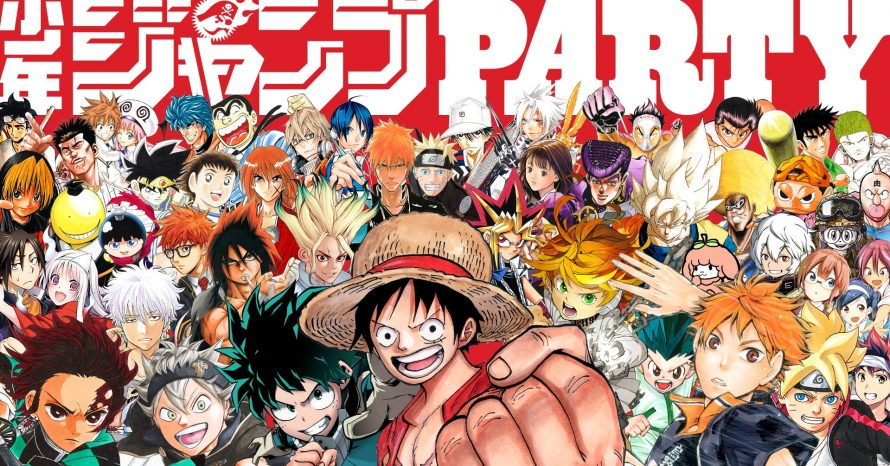

#An analysis on Mangas dataset 
###By Gabriel Alves das Neves

I seek to analyze a set of Manga (Japanese HQ) data from Kaggle and answer questions:

  - How is the score distributed in the genres?
  - What are the most abundant genres in the dataset?
  - What are the top 5 mangas?
  - What makes a manga popular? (Question proposed by kaggle's author)
 
 If you want to donwload the data set [here is the link](https://www.kaggle.com/ajpass/top-ranked-mangas-myanimelist-mal)


##Usefull Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
import seaborn as sn

##Download the dataset

In [60]:
# reading data with pandas
dataSet = pd.read_csv('/content/top500mangaMAL.csv')
# let's take a look...
print(len(dataSet))
dataSet.head()

500


,Manga ID,Manga URL,English Title,Synonims Titles,Japanese Title,Type,Volumes,Chapters,Status,Published,Published Dates,Genres,Author,Serialization,Score,Ranked,Popularity,Members,Favorites,Score Voted By
0,2,https://myanimelist.net/manga/2/Berserk,Berserk,Berserk: The Prototype,ベルセルク,Manga,Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","{'from': '1989-08-25', 'to': 'Unknown'}","['Action', 'Adventure', 'Demons', 'Drama', 'Fa...","['Miura, Kentarou (Story & Art)']",Young Animal,9.33,1,4,296958,61992,139571
1,1706,https://myanimelist.net/manga/1706/JoJo_no_Kim...,Unknown,JoJo's Bizarre Adventure Part 7: Steel Ball Ru...,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,Manga,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","{'from': '2004-01-19', 'to': '2011-04-19'}","['Action', 'Adventure', 'Mystery', 'Historical...","['Araki, Hirohiko (Story & Art)']",Ultra Jump,9.21,2,50,97073,18083,54901
2,25,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,"Full Metal Alchemist, Hagane no Renkinjutsushi...",鋼の錬金術師,Manga,27,116,Finished,"Jul 12, 2001 to Sep 11, 2010","{'from': '2001-07-12', 'to': '2010-09-11'}","['Action', 'Adventure', 'Comedy', 'Drama', 'Sh...","['Arakawa, Hiromu (Story & Art)']",Shounen Gangan,9.12,3,11,197562,26386,110885
3,13,https://myanimelist.net/manga/13/One_Piece,One Piece,Unknown,ONE PIECE,Manga,Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","{'from': '1997-07-22', 'to': 'Unknown'}","['Action', 'Adventure', 'Comedy', 'Fantasy', '...","['Oda, Eiichiro (Story & Art)']",Shounen Jump (Weekly),9.08,4,2,306944,75106,185560
4,1,https://myanimelist.net/manga/1/Monster,Monster,Unknown,MONSTER,Manga,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","{'from': '1994-12-05', 'to': '2001-12-20'}","['Mystery', 'Drama', 'Psychological', 'Seinen']","['Urasawa, Naoki (Story & Art)']",Big Comic Original,9.07,5,39,103030,10000,41412


##Exploratory data analysis

###Pre-processing

preparing column "Genres"

In [61]:
genres_treat = []
genres = dataSet['Genres']
for genre in genres:
  aux = eval(genre)
  genres_treat.append(aux[len(aux)-1])

dataSet['Genres']=genres_treat


Unknow objects *name* treatment

In [62]:
dataSet.loc[(dataSet["English Title"]=="Unknown") & (dataSet["Synonims Titles"]=="Unknown"),"English Title"] = dataSet["Japanese Title"]
dataSet.loc[(dataSet["English Title"]=="Unknown") & (dataSet["Synonims Titles"]!="Unknown"),"English Title"] = dataSet["Synonims Titles"]
dataSet.loc[(dataSet["English Title"]=="Unknown") & (dataSet["Synonims Titles"]!="Unknown") & (dataSet["Japanese Title"]!="Unknown"),"English Title"] = dataSet["Manga URL"]

Volumes and chapters treatment

In [63]:
dataSet["Volumes"] = dataSet["Volumes"].map(lambda x:np.nan if x=="Unknown" else x)
dataSet["Chapters"] = dataSet["Chapters"].map(lambda x:np.nan if x=="Unknown" else x)
dataSet["Chapters"].fillna(dataSet["Chapters"].median(),inplace = True)
dataSet["Volumes"].fillna(dataSet["Volumes"].median(),inplace = True)

In [64]:
dataSet

,Manga ID,Manga URL,English Title,Synonims Titles,Japanese Title,Type,Volumes,Chapters,Status,Published,Published Dates,Genres,Author,Serialization,Score,Ranked,Popularity,Members,Favorites,Score Voted By
0,2,https://myanimelist.net/manga/2/Berserk,Berserk,Berserk: The Prototype,ベルセルク,Manga,12,73,Publishing,"Aug 25, 1989 to ?","{'from': '1989-08-25', 'to': 'Unknown'}",Seinen,"['Miura, Kentarou (Story & Art)']",Young Animal,9.33,1,4,296958,61992,139571
1,1706,https://myanimelist.net/manga/1706/JoJo_no_Kim...,JoJo's Bizarre Adventure Part 7: Steel Ball Ru...,JoJo's Bizarre Adventure Part 7: Steel Ball Ru...,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,Manga,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","{'from': '2004-01-19', 'to': '2011-04-19'}",Supernatural,"['Araki, Hirohiko (Story & Art)']",Ultra Jump,9.21,2,50,97073,18083,54901
2,25,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,"Full Metal Alchemist, Hagane no Renkinjutsushi...",鋼の錬金術師,Manga,27,116,Finished,"Jul 12, 2001 to Sep 11, 2010","{'from': '2001-07-12', 'to': '2010-09-11'}",Military,"['Arakawa, Hiromu (Story & Art)']",Shounen Gangan,9.12,3,11,197562,26386,110885
3,13,https://myanimelist.net/manga/13/One_Piece,One Piece,Unknown,ONE PIECE,Manga,12,73,Publishing,"Jul 22, 1997 to ?","{'from': '1997-07-22', 'to': 'Unknown'}",Super,"['Oda, Eiichiro (Story & Art)']",Shounen Jump (Weekly),9.08,4,2,306944,75106,185560
4,1,https://myanimelist.net/manga/1/Monster,Monster,Unknown,MONSTER,Manga,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","{'from': '1994-12-05', 'to': '2001-12-20'}",Seinen,"['Urasawa, Naoki (Story & Art)']",Big Comic Original,9.07,5,39,103030,10000,41412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27967,https://myanimelist.net/manga/27967/Pandora_He...,Pandora Hearts: Caucus Race,Unknown,PandoraHearts ～Caucus race～,Novel,3,14,Finished,"Mar 26, 2011 to May 27, 2013","{'from': '2011-03-26', 'to': '2013-05-27'}",Supernatural,"['Mochizuki, Jun (Art)', ' Wakamiya, Shinobu (...",None,8.12,496,3555,3270,65,575
496,48025,https://myanimelist.net/manga/48025/Magi__Sinb...,Magi: The Adventures of Sinbad,Unknown,マギ シンドバッドの冒険,Manga,19,182,Finished,"May 8, 2013 to May 2, 2018","{'from': '2013-05-08', 'to': '2018-05-02'}",Shounen,"['Ohtaka, Shinobu (Story)', ' Ohtera, Yoshifum...",Ura Sunday,8.12,497,406,22938,646,8513
497,18074,https://myanimelist.net/manga/18074/Getter_Rob...,Getter Robo Saga,Getter Robo,Unknown,Manga,9,69,Finished,Not available,"{'from': 'Unknown', 'to': 'Unknown'}",Shounen,"['Ishikawa, Ken (Story & Art)']",None,8.11,498,8937,1103,100,325
498,35003,https://myanimelist.net/manga/35003/Yamada-kun...,Yamada-kun and the Seven Witches,"Yamada-kun to Nananin no Majo, 7 Witches, Maou...",山田くんと7人の魔女,Manga,28,246,Finished,"Feb 22, 2012 to Feb 22, 2017","{'from': '2012-02-22', 'to': '2017-02-22'}",Supernatural,"['Yoshikawa, Miki (Story & Art)']",Shounen Magazine (Weekly),8.11,499,62,87041,4637,40015


###Exploring

####How is the score by genres distributed?

---



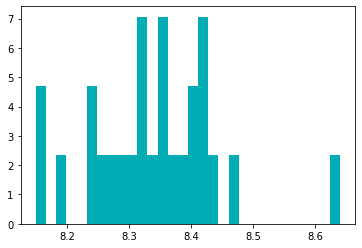

In [92]:
y = dataSet.groupby('Genres')['Score'].mean().sort_values(ascending=True)
plt.hist(y.values, density=True, bins=30,color ='#00ADB5');

**They're between 8,7 and 8,1**

####Wich is the most abundant genre in our dataset?

---


Let's visualize it:




Counting genres by ID

In [99]:
x = dataSet.groupby('Genres')['Manga ID'].count().sort_values(ascending=True)
x

Genres
Comedy             1
Mystery            1
Historical         1
Vampire            1
Harem              2
Space              2
Game               2
Drama              2
Magic              3
Police             3
Gender             7
Romance            7
School             8
Thriller           8
Military          10
Sci               11
Super             11
Josei             14
Sports            14
Fantasy           19
Psychological     35
Shoujo            36
Shounen           57
Slice             61
Supernatural      78
Seinen           106
Name: Manga ID, dtype: int64

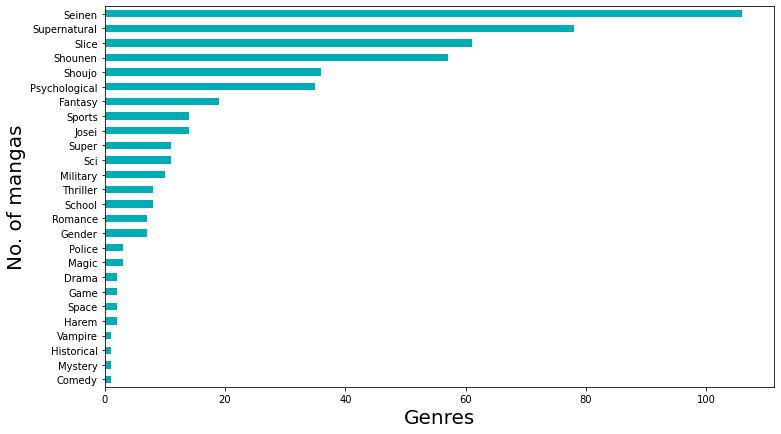

In [100]:

x.plot.barh(figsize=(12,7),color ='#00ADB5')
plt.xlabel("Genres",size=20)
plt.ylabel("No. of mangas",size=20)
plt.show()

**In this data set, the most abundant genres are:**
- Seinen;
- Supernatural;
- Shounen;
- Shoujo.

####What about the top 5 mangas?
---

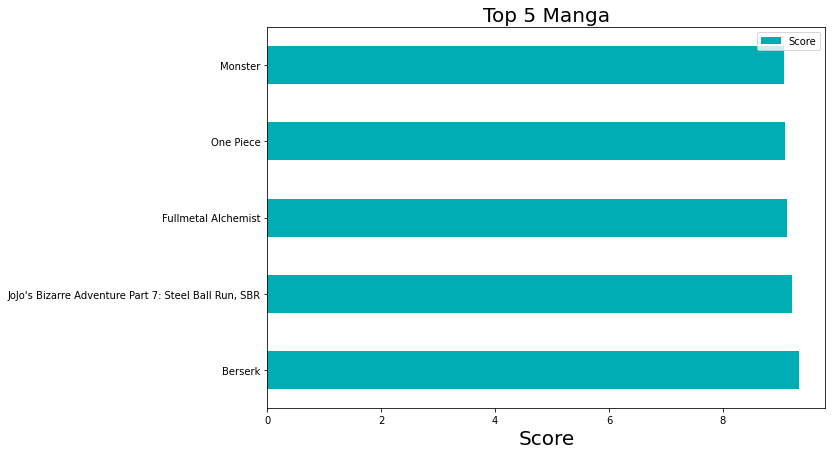

In [96]:
x1 = dataSet.loc[0:len(dataSet)-1, ['English Title','Score']]
top_mangas = x1.sort_values('Score',ascending=False)
interval = top_mangas[0:5]
interval.plot.barh(x='English Title', y='Score',figsize=(10,7),color ='#00ADB5')
plt.xlabel("Score",size=20)
plt.ylabel("",size=20)
plt.title("Top 5 Manga",size=20)
plt.show();

**In this data set, the top five Manga is:**
- Berserk;
- Jojo's Bizarre Adventure;
- Fullmetal Alchemist;
- One Piece;
- Monster. 

####What makes a manga popular?
---



Variables within a dataset can be related for lots of reasons and we need to check if there is a [correlation](https://medium.com/analytics-vidhya/what-is-correlation-4fe0c6fbed47) between an information and Popularity values. 

In many cases the relationship is not apparent, so we must resort to more reliable methods of detection.

If the relationship is linear, the [Pearson method](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is the most suitable.

Let's check this. For now, I will consider all available items because I rekon it's a reduced data set, based on [the first Manga publication](https://en.wikipedia.org/wiki/History_of_manga).

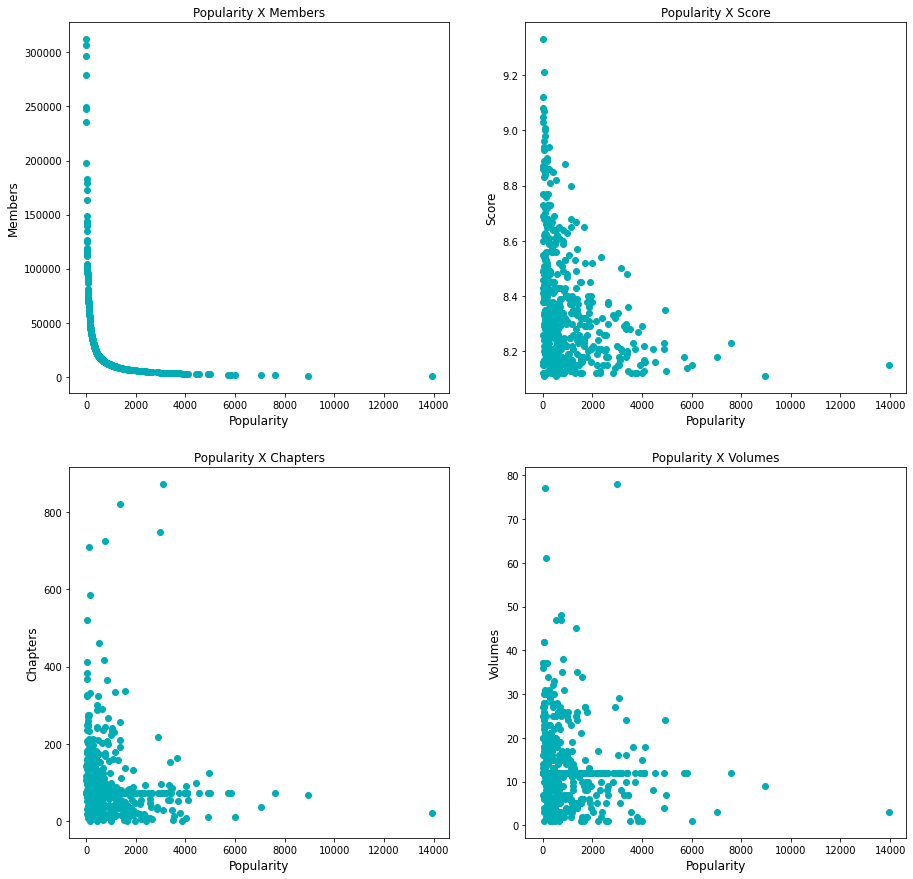

In [97]:
Popularity=dataSet["Popularity"]
Members=dataSet["Members"]
Score =dataSet["Score"]
Chapters = dataSet["Chapters"]
Volumes = dataSet["Volumes"]

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.scatter(Popularity, Members,color ='#00ADB5')
plt.title('Popularity X Members')
plt.xlabel("Popularity",size=12)
plt.ylabel("Members",size=12)

plt.subplot(2,2,2)
plt.scatter(Popularity, Score,color ='#00ADB5')
plt.title('Popularity X Score')
plt.xlabel("Popularity",size=12)
plt.ylabel("Score",size=12)

plt.subplot(2,2,3)
plt.scatter(Popularity, Chapters,color ='#00ADB5')
plt.title('Popularity X Chapters')
plt.xlabel("Popularity",size=12)
plt.ylabel("Chapters",size=12)

plt.subplot(2,2,4)
plt.scatter(Popularity, Volumes,color ='#00ADB5')
plt.title('Popularity X Volumes')
plt.xlabel("Popularity",size=12)
plt.ylabel("Volumes",size=12)

plt.show()

It seems it's not a situation to use Pearsons Method. Spearman's correlation coefficient is indicated to calculate the correlation between variables related not necessarily linearly. 


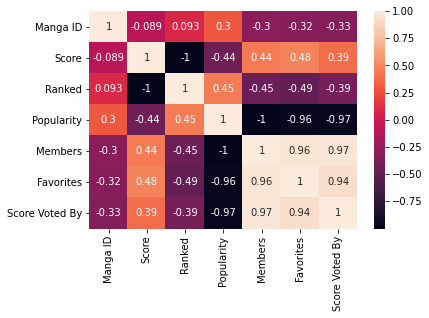

In [98]:
# dataSet.corr() executes the pearsons method, so...
corr_matrix = dataSet.corr(method="spearman")
corr_matrix.style.background_gradient()
sn.heatmap(corr_matrix, annot=True)
plt.show();

About these values:
- 0.9 to 1 indicates a very strong correlation;
- 0.7 to 0.9 indicates a strong correlation;
- 0.5 to 0.7 indicates a moderate correlation;
- 0.3 to 0.5 indicates a weak correlation;
- 0 to 0.3 indicates a negligible correlation.


 **We can see that there is a strong correlation between Popularity and: Score Voted by, Favorites and Members. It tells us that maybe there's an interdependence between these variables. Maybe, this is one group of feature that makes an anime popular**




It is very important to note that even a strong correlation does not imply that x “causes” y! [Here](https://www.tylervigen.com/spurious-correlations) you can see some examples. Also [Here ](https://www.stat.berkeley.edu/~rabbee/correlation.pdf) you can learn some ways to look at the correlation coefficient.



##That's it! Thanks!

#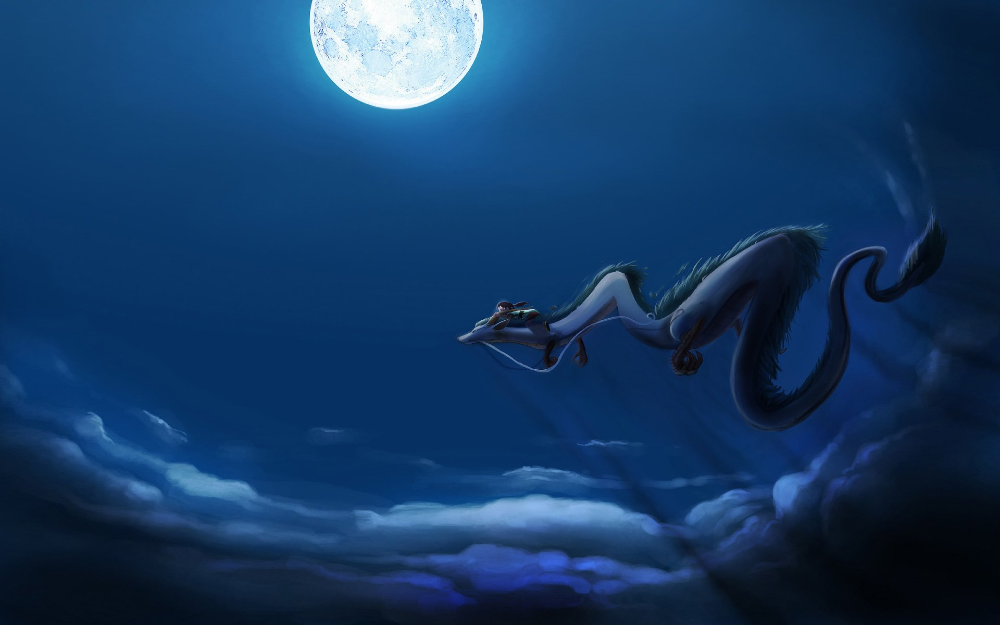